# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [34]:
# Import library untuk manipulasi data
import pandas as pd
import numpy as np

# Import library untuk visualisasi (opsional)
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk preprocessing dan pembagian dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import library untuk model klasifikasi
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import library untuk evaluasi model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Import library untuk hyperparameter tuning (jika diperlukan)
from sklearn.model_selection import GridSearchCV

# Import library untuk menyimpan model
import joblib

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [35]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]

# Membaca dataset hasil interpretasi clustering
df = pd.read_csv("data_clustering_inverse.csv")

In [36]:
# Cek informasi umum dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2515 non-null   float64
 1   CustomerAge          2515 non-null   float64
 2   TransactionDuration  2515 non-null   float64
 3   LoginAttempts        2515 non-null   float64
 4   AccountBalance       2515 non-null   float64
 5   Target               2515 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 118.0 KB
None


In [37]:
# Tampilkan 5 baris pertama dengan function head.
print("Dataset yang digunakan (dengan interpretasi hasil clustering):")
display(data.head())

Dataset yang digunakan (dengan interpretasi hasil clustering):


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Target
0,14.09,70.000000,81.0,1.0,5112.21,0
1,376.24,68.000000,141.0,1.0,13758.91,2
2,126.29,19.000000,56.0,1.0,1122.35,2
3,184.50,26.000000,25.0,1.0,8569.06,0
4,13.45,44.644916,198.0,1.0,7429.40,1


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [38]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.

# Memisahkan fitur dan target
X = df.drop(columns=['Target'])  # ganti 'Target' dengan nama kolom target kamu jika beda
y = df['Target']


In [39]:
# Membagi data menjadi training dan testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,         # 20% data untuk test, 80% data untuk training
    random_state=42,       
    stratify=y             
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 2012
Test size: 503


*Insight Data Splitting :*
- Dataset total berjumlah 2515 data.
- Data terbagi menjadi:
    - Training set: 2012 data (80%)
    - Testing set: 503 data (20%)

# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

Akurasi: 0.3379721669980119

Laporan klasifikasi:
               precision    recall  f1-score   support

           0       0.35      0.36      0.36       171
           1       0.37      0.35      0.36       166
           2       0.30      0.30      0.30       166

    accuracy                           0.34       503
   macro avg       0.34      0.34      0.34       503
weighted avg       0.34      0.34      0.34       503



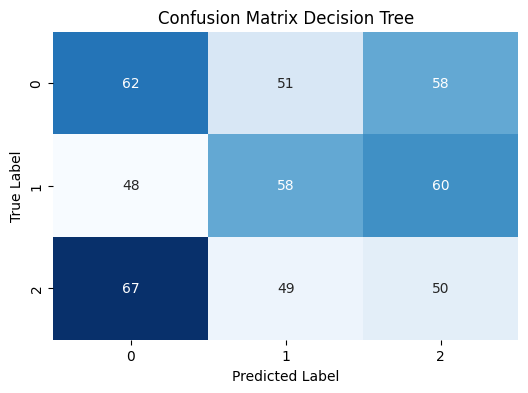

In [40]:
# Buatlah model klasifikasi menggunakan Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# 2. Melatih model menggunakan data training
dt_model.fit(X_train, y_train)

# 3. Prediksi data testing
y_pred = dt_model.predict(X_test)

# 4. Evaluasi hasil prediksi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan klasifikasi:\n", classification_report(y_test, y_pred, zero_division=0))

# 5. Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Decision Tree')
plt.show()


In [41]:
# Menyimpan Model
# import joblib
# joblib.dump(model, 'decision_tree_model.h5')

import joblib

# Simpan model Decision Tree ke file
joblib.dump(dt_model, 'decision_tree_model.h5')


['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

**Hyperparameter tuning supaya model optimal*

**Melatih model menggunakan Random Forest*

Akurasi Random Forest: 0.31610337972166996

Laporan klasifikasi:
               precision    recall  f1-score   support

           0       0.34      0.38      0.36       171
           1       0.34      0.30      0.32       166
           2       0.26      0.27      0.26       166

    accuracy                           0.32       503
   macro avg       0.32      0.32      0.32       503
weighted avg       0.32      0.32      0.32       503



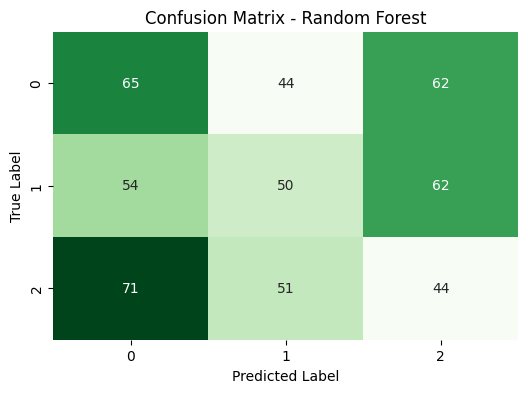

In [42]:
# Melatih model menggunakan algoritma klasifikasi selain Decision Tree.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)

# 2. Melatih model
rf_model.fit(X_train, y_train)

# 3. Prediksi
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluasi
print("Akurasi Random Forest:", accuracy_score(y_test, y_pred_rf))
print("\nLaporan klasifikasi:\n", classification_report(y_test, y_pred_rf))

# 5. Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [43]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.

from sklearn.metrics import precision_score, recall_score, f1_score

# Prediksi untuk Decision Tree (sudah dari sebelumnya)
y_pred_dt = dt_model.predict(X_test)

# Prediksi untuk Random Forest
y_pred_rf = rf_model.predict(X_test)

# Buat dataframe perbandingan
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ],
    'Precision': [
        precision_score(y_test, y_pred_dt, average='weighted', zero_division=0),
        precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
    ],
    'Recall': [
        recall_score(y_test, y_pred_dt, average='weighted', zero_division=0),
        recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_dt, average='weighted', zero_division=0),
        f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)
    ]
})

# Tampilkan hasil
print(results)


           Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree  0.337972   0.338449  0.337972  0.338099
1  Random Forest  0.316103   0.316536  0.316103  0.315490


In [44]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
# import joblib
# joblib.dump(___, 'explore_<Nama Algoritma>_classification.h5')

import joblib

# Simpan model Random Forest
joblib.dump(rf_model, 'explore_random_forest_classification.h5')


['explore_random_forest_classification.h5']

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [45]:
# Lakukan Hyperparameter Tuning dan Latih ulang.
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validation accuracy: 0.365311161315013


In [46]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Akurasi:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred_best, average='weighted', zero_division=0))
print("F1-Score:", f1_score(y_test, y_pred_best, average='weighted', zero_division=0))

print("\nClassification Report:\n", classification_report(y_test, y_pred_best, zero_division=0))


Akurasi: 0.36182902584493043
Precision: 0.3589015944712196
Recall: 0.36182902584493043
F1-Score: 0.35848903843793395

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.45      0.41       171
           1       0.39      0.37      0.38       166
           2       0.31      0.27      0.29       166

    accuracy                           0.36       503
   macro avg       0.36      0.36      0.36       503
weighted avg       0.36      0.36      0.36       503



*Insight :*
- Kelas 0 memiliki performa terbaik dengan precision 38%, recall 45%, dan F1-score 41%.
- Kelas 1 juga cukup seimbang dengan precision dan recall sekitar 37-39%.
- Kelas 2 memiliki performa terendah, dengan recall dan precision sekitar 27-31%.

In [47]:
# Menyimpan Model hasil tuning
# import joblib
# joblib.dump(model_dt, 'tuning_classification.h5')

import joblib

joblib.dump(best_model, 'tuning_classification.h5')
print("Model hasil tuning berhasil disimpan sebagai 'tuning_classification.h5'")


Model hasil tuning berhasil disimpan sebagai 'tuning_classification.h5'
